# **Model Building For Vegetable Disease Prediction**

### **1.Importing The Libraries**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **2.Initializing The Model**

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)


In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)


In [ ]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/DataSet/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.


In [ ]:
x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/DataSet/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set',target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 3416 images belonging to 9 classes.


### **3.Adding CNN Layers**

In [ ]:
model=Sequential()


In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))


In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))


In [ ]:
model.add(Flatten())


In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


### **4.Adding Dense Layers**

In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [ ]:
model.add(Dense(9,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


### **5.Training the Model**

In [ ]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)


Epoch 1/10
475/475 [==============================] - 367s 767ms/step - loss: 1.3807 - accuracy: 0.6129 - val_loss: 0.8594 - val_accuracy: 0.6830
Epoch 2/10
475/475 [==============================] - 357s 750ms/step - loss: 0.5692 - accuracy: 0.7973 - val_loss: 0.6733 - val_accuracy: 0.7731
Epoch 3/10
475/475 [==============================] - 358s 753ms/step - loss: 0.4537 - accuracy: 0.8387 - val_loss: 0.3422 - val_accuracy: 0.8820
Epoch 4/10
475/475 [==============================] - 361s 761ms/step - loss: 0.3929 - accuracy: 0.8599 - val_loss: 0.3459 - val_accuracy: 0.8832
Epoch 5/10
475/475 [==============================] - 359s 756ms/step - loss: 0.3234 - accuracy: 0.8881 - val_loss: 0.2774 - val_accuracy: 0.8949
Epoch 6/10
475/475 [==============================] - 362s 761ms/step - loss: 0.3026 - accuracy: 0.8955 - val_loss: 0.3731 - val_accuracy: 0.8788
Epoch 7/10
475/475 [==============================] - 356s 749ms/step - loss: 0.2719 - accuracy: 0.9051 - val_loss: 0.7005 -

### **6.Saving the Model**

In [ ]:
model.save('vegetabledata.h5')

In [ ]:
model=load_model('vegetabledata.h5')

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/DataSet/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/b475147c-92bc-419a-b2c3-7d5aabbb79ec___RS_Early.B 7379.JPG")

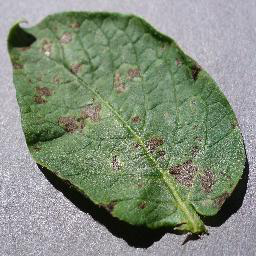

In [ ]:
img

In [ ]:
x=image.img_to_array(img)


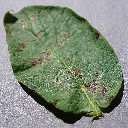

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/DataSet/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/b475147c-92bc-419a-b2c3-7d5aabbb79ec___RS_Early.B 7379.JPG",target_size=(128,128))
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[191., 189., 200.],
        [189., 187., 198.],
        [189., 187., 198.],
        ...,
        [178., 176., 190.],
        [183., 181., 195.],
        [174., 172., 186.]],

       [[184., 182., 193.],
        [192., 190., 201.],
        [195., 193., 204.],
        ...,
        [181., 179., 193.],
        [191., 189., 203.],
        [173., 171., 185.]],

       [[184., 182., 193.],
        [192., 190., 201.],
        [197., 195., 206.],
        ...,
        [174., 172., 186.],
        [183., 181., 195.],
        [171., 169., 183.]],

       ...,

       [[163., 161., 172.],
        [176., 174., 185.],
        [159., 157., 168.],
        ...,
        [158., 156., 167.],
        [131., 130., 138.],
        [145., 144., 152.]],

       [[171., 169., 180.],
        [167., 165., 176.],
        [174., 172., 183.],
        ...,
        [137., 135., 146.],
        [134., 133., 141.],
        [185., 184., 192.]],

       [[157., 155., 166.],
        [224., 222., 233.],
        [204., 2

In [ ]:
x=np.expand_dims(x,axis=0)


In [ ]:
x

array([[[[191., 189., 200.],
         [189., 187., 198.],
         [189., 187., 198.],
         ...,
         [178., 176., 190.],
         [183., 181., 195.],
         [174., 172., 186.]],

        [[184., 182., 193.],
         [192., 190., 201.],
         [195., 193., 204.],
         ...,
         [181., 179., 193.],
         [191., 189., 203.],
         [173., 171., 185.]],

        [[184., 182., 193.],
         [192., 190., 201.],
         [197., 195., 206.],
         ...,
         [174., 172., 186.],
         [183., 181., 195.],
         [171., 169., 183.]],

        ...,

        [[163., 161., 172.],
         [176., 174., 185.],
         [159., 157., 168.],
         ...,
         [158., 156., 167.],
         [131., 130., 138.],
         [145., 144., 152.]],

        [[171., 169., 180.],
         [167., 165., 176.],
         [174., 172., 183.],
         ...,
         [137., 135., 146.],
         [134., 133., 141.],
         [185., 184., 192.]],

        [[157., 155., 166.],
       

In [ ]:
y=np.argmax(model.predict(x),axis=1)


1/1 [==============================] - 0s 95ms/step


In [ ]:
x_train.class_indices


{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [ ]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']


In [ ]:
index[y[0]]


'Potato___Early_blight'

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/DataSet/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/b475147c-92bc-419a-b2c3-7d5aabbb79ec___RS_Early.B 7379.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 43ms/step


'Potato___Early_blight'